# Sudoku Project
by Finn Potason (s2.wang@vu.nl)

This is a quick tutorial for MSc Logic students and those who struggle to kick off the project.

First of all you need the Pycosat solver [1].
In your terminal [2], type: pip install pycosat

[1] See more details at: https://pypi.python.org/pypi/pycosat
[2] Press ctrl + alt + t.

Next we test if the solver is working: 

In [27]:
import pycosat
cnf = [[1, 5,4], [-1,5,3,4], [-3, -4]]
pycosat.solve(cnf)

[1, -2, -3, -4, 5]

Next, you can print all the possible assignments to this CNF. 

In [28]:
print ('There are in total ', len(list(pycosat.itersolve(cnf))), ' possible assignments:')
for sol in pycosat.itersolve(cnf):
    print(sol)


There are in total  18  possible assignments:
[1, -2, -3, -4, 5]
[1, -2, -3, 4, -5]
[1, -2, -3, 4, 5]
[1, -2, 3, -4, -5]
[1, -2, 3, -4, 5]
[1, 2, 3, -4, -5]
[1, 2, 3, -4, 5]
[1, 2, -3, -4, 5]
[1, 2, -3, 4, -5]
[1, 2, -3, 4, 5]
[-1, 2, -3, 4, -5]
[-1, 2, -3, 4, 5]
[-1, 2, -3, -4, 5]
[-1, 2, 3, -4, 5]
[-1, -2, 3, -4, 5]
[-1, -2, -3, -4, 5]
[-1, -2, -3, 4, -5]
[-1, -2, -3, 4, 5]


## Encode Sudoku
Take a random sudoku and think what the propositional variables are.
PS: You will need the library numpy. If you don't have it, install it (and reboot if needed).

In [29]:
import numpy as np
s_test = np.array([[8,0,6,5,0,0,0,0,0],
                    [0,0,4,0,0,0,0,0,8],
                    [0,0,0,0,0,0,6,0,0],
                    [0,0,0,0,0,0,0,0,0],
                    [3,7,0,4,5,0,0,0,0],
                    [5,0,1,0,9,8,0,0,7],
                    [0,0,0,0,0,7,0,2,0],
                    [2,5,7,1,6,0,0,0,9],
                    [0,8,0,0,3,0,0,4,0]])
print(s_test)

[[8 0 6 5 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 8]
 [0 0 0 0 0 0 6 0 0]
 [0 0 0 0 0 0 0 0 0]
 [3 7 0 4 5 0 0 0 0]
 [5 0 1 0 9 8 0 0 7]
 [0 0 0 0 0 7 0 2 0]
 [2 5 7 1 6 0 0 0 9]
 [0 8 0 0 3 0 0 4 0]]


In [30]:
N=9
M=3 #blocks size
names = np.zeros([N,N,N], dtype = np.int)

index = 1
def trans_pl(N): #transform to propositional variables per cell
    for i in range(N):
        for j in range(N):
            #print('introduce a 9 propositional variables to each cell:')
            for k in range(N):
                names[i][j][k] = i * N*N + j * N + k +1
                #print('if the cell at row: ', i+1, ' column: ', j+1, 'is ', k+1, 'then it is named ', names[i][j][k])
    return names

In [31]:
names = trans_pl(N)
print ('When the cell at row 3 column 4 is 6')
print('the variable' , names[0][0][0], ' is true')
print('please be careful about the indexing!!!')

When the cell at row 3 column 4 is 6
the variable 1  is true
please be careful about the indexing!!!


In [32]:
encode_cnf = []
print('start populate this cnf:', encode_cnf)

start populate this cnf: []


Next, we define two functions to obtain the function exactly one. 

In [33]:
def encode_at_most_one(names):
    encode = []
    for i in range(len(names)):
        for j in range(i+1, len(names)):
            arr = [-1*names[i], -1*names[j]]
            encode.insert(0, arr)
    return encode
      
test_names = [1,2,3]
enc = encode_at_most_one(test_names)
print('at most one is encoded as: ',enc)
encode_cnf.extend(enc)

def encode_at_least_one(names):
    return [names]
enc = encode_at_least_one(test_names)
print('at least one is encoded as:', enc)
encode_cnf.extend(enc)
print('put them together, you get: ', encode_cnf)
print ('as you can see, there is exactly one true:')
pycosat.solve(encode_cnf)
# TODO: introduce a function called encode_exactly_one(names) 
#       and update the code above

def exactly_one(names):
    cnf = [ names ]
    n = len(names)

    for i in range(n):
        for j in range(i+1, n):

            cnf.append([-names[i], -names[j]])

    return cnf

def inverse_pl(val):
    val, k = divmod(val-1, N)
    val, j = divmod(val, N)
    val, i = divmod(val, N)
    return i, j, k

print(exactly_one(test_names))

at most one is encoded as:  [[-2, -3], [-1, -3], [-1, -2]]
at least one is encoded as: [[1, 2, 3]]
put them together, you get:  [[-2, -3], [-1, -3], [-1, -2], [1, 2, 3]]
as you can see, there is exactly one true:
[[1, 2, 3], [-1, -2], [-1, -3], [-2, -3]]


## load sudokus database


In [34]:
import csv
import numpy as np

def read_files(fn):
    l=[]
    d ={}
    su=[]
    sol=[]
    i=0
    with open(fn,"r+") as f:
        for line1 in f:
            line1=line1[:81]
            for c1 in line1:
                if c1 in '123456789':
                    su.append(int(c1))
                else:
                    su.append(0)
            arr1 = np.array(su)
            su=[]
            arr1 = arr1.reshape((9,9))
            d = {"sudoku":arr1}#, "solution":arr2}
            l.append(d)
        return(l)


#files with 25, 30, 35, 40 and 45 givens    
files = ['0.txt', '1.txt', '2.txt', '3.txt','5.txt']
zero = read_files(files[0])
one = read_files(files[1])
two = read_files(files[2])
three = read_files(files[3])
five = read_files(files[4])



## 1) For each cell, row and column constraints

In [35]:
def cons_cell_row_cols(N):
    cnf=[]
    for i in range(N):
        for s in range(N):
            #For each row, for each number, exactly one propositional variable is true
            cnf = cnf + exactly_one([ int(names[i, j, s]) for j in range(N) ])
            #For each column, for each number, exactly one varialbe is true
            cnf = cnf + exactly_one([ int(names[j, i, s]) for j in range(N) ])

        #For each cell, exactly one variable is true
        for j in range(N):
            cnf = cnf + exactly_one([ int(names[i, j, k]) for k in range(N) ])
    return cnf



## 4) For each block, for each number, exactly one variable is true.

In [36]:
# Block constraints
def cons_blocks(N):
    cnf=[]
    for k in range(N):
        for x in range(M):
            for y in range(M):
                v = [ int(names[y*M + i, x*M + j, k]) for i in range(M) for j in range(M)]
                cnf = cnf + exactly_one(v)
    return cnf

## 6) Main call

In [68]:

import subprocess
N=9

#function to parse the statistics generated by zchaff SAT-solver, we don't use them all, only a couple of them

def parse_stats(result, cputime): 
    stats = {}
    for r in result:
        r=r.decode('utf-8')
        if r=='Dec:':
            value=next(result).decode('utf-8')
            stats[r] =float(value)
        if r=='AddCl:':
            value=next(result).decode('utf-8')
            stats[r] =float(value)
        if r=='AddLit:':
            value=next(result).decode('utf-8')
            stats[r] =float(value)
        if r=='DelCl:':
            value=next(result).decode('utf-8')
            stats[r] =float(value)
        if r=='DelLit:':
            value=next(result).decode('utf-8')
            stats[r] =float(value)
        if r=='NumImp:':
            value=next(result).decode('utf-8')
            stats[r] =float(value)
        if r=='AveBubbleMove:':
            value=next(result).decode('utf-8')
            stats[r] =float(value)
        if r=='Random':
            value=r + ' ' + next(result).decode('utf-8') + ' ' + next(result).decode('utf-8')
            stats[value] =float(next(result).decode('utf-8'))
        if r=='Max':
            value= r+ ' ' + next(result).decode('utf-8') + ' ' + next(result).decode('utf-8')
            stats[value] =float(next(result).decode('utf-8'))
        if r=='Num.':
            value= r+ ' ' + next(result).decode('utf-8') + ' ' + next(result).decode('utf-8')
            stats[value] =float(next(result).decode('utf-8'))
        if r=='Num':
            value= r+ ' ' + next(result).decode('utf-8') + ' ' + next(result).decode('utf-8')
            stats[value] =float(next(result).decode('utf-8'))
        if r=='Original':
            value= r+ ' ' + next(result).decode('utf-8') + ' ' + next(result).decode('utf-8')
            stats[value] =float(next(result).decode('utf-8'))
        if r=='(':
            s_stack = next(result).decode('utf-8')
            temp = next(result).decode('utf-8')
            s_vsids = next(result).decode('utf-8')
            temp = next(result).decode('utf-8')
            s_shrink_d= next(result).decode('utf-8') + ' ' + next(result).decode('utf-8')
            #print(" shrink= ", s_shrink_d)
            temp = next(result).decode('utf-8') 
            v_stack = float(next(result).decode('utf-8'))
            temp = next(result).decode('utf-8')
            v_vsids = float(next(result).decode('utf-8'))
            temp = next(result).decode('utf-8')
            v_shrink_d = float(next(result).decode('utf-8'))
            stats[s_stack] =v_stack           
            stats[s_vsids] =v_vsids           
            stats[s_shrink_d] =v_shrink_d           
        if r=='Added':
            value= r+ ' ' + next(result).decode('utf-8') + ' ' + next(result).decode('utf-8')
            stats[value] =float(next(result).decode('utf-8'))
        if r=='Deleted':
            value1=next(result).decode('utf-8')
            if value1== 'Clauses':
                value = r+ ' ' + value1
                stats[value] =float(next(result).decode('utf-8') )
            else:
                value= r+ ' ' + value1 + ' ' + next(result).decode('utf-8') 
                stats[value] =float(next(result).decode('utf-8'))
        if r=='Number':
            value= r + ' ' + next(result).decode('utf-8') + ' ' + next(result).decode('utf-8')
            stats[value] =float(next(result).decode('utf-8'))
        if r=='Total':
            value= r+ ' ' + next(result).decode('utf-8') + ' ' + next(result).decode('utf-8')
            stats[value] =np.log(float(next(result).decode('utf-8')))
        if r=='RESULT:':
            value=next(result)
            stats[r] =value.decode('utf-8')
        if r[0:8] == 'RunTime:':
            value=float(r[8:len(r)])
            stats['CPUTime'] = np.log(value) #value.decode('utf-8')    #print('stats=',stats)
            #print(stats)
    stats["cputime"] = cputime
    return stats

def isInt(string):
    try:
        int(string)
        return True
    except ValueError:
        return False
    
def extract_solution(result):
    solution=[]
    for r in result:
        if r.decode('utf-8') == 'Satisfiable':
            e=next(result).decode('utf-8')
            while e!= 'Random' and isInt(e)==True:
                solution.append(int(e))
                e=next(result)
    return(solution)

#solves one single sudoku, it makes a call to zchaff

def solve(clauses):
    # CREDITS: this zchaf call was originally published at 
    #http://www.cs.carleton.edu/faculty/dmusican/cs321s10/SATSolver.py
    import time
    maxVar = 0
    for clause in clauses:
        for literal in clause:
            maxVar = max(abs(literal),maxVar)
    out = open('query.cnf','w')
    out.write('c This DIMACS format CNF file\n')
    out.write('c Do not edit.\n')
    out.write('p cnf ' + str(maxVar) + ' ' + str(len(clauses)) + '\n')
    for clause in clauses:
        for literal in clause:
            out.write(str(literal) + ' ')
        out.write('0\n')
    out.close()
    t=time.clock()
    #CHANGE THE PATH AND INSTALL ZCHAFF TO RUN IT
    
    process = subprocess.Popen('/Users/edwinlima/Downloads/zchaff64/zchaff query.cnf',stdout=subprocess.PIPE,
                shell=True)
    cputime=time.clock() - t
    process.wait()
    stdout = process.stdout
    result = stdout.read().split()
    stdout.close()
    it = iter(result)
    solution = extract_solution(it)
    it = iter(result)
    stats = parse_stats(it, cputime)
    it = iter(result)
    for e in it:
        e= e.decode('utf-8')
        if e== 'RESULT:':
            e=next(it).decode('utf-8')
            if e == 'SAT':
                return True,solution, stats
            elif e == 'UNSAT':
                solution = np.zeros((9,9))
                return False, solution, stats
            else:
                print("Error: SAT/UNSAT not indicated in query.cnf.")
                return False

#extract number of givens from puzzle per block, we will use this to calculate the scattering of the puzzle

def nog_block(puzzle):
    N=9
    M=3
    nog=0
    l_nog_b=[]
    for H in range(M):
        for V in range(M):
            for r in range(M):
                for c in range(M):
                    if puzzle[H*M+r, V*M+c] !=0:
                        nog+=1
            l_nog_b.append(nog)
            nog=0
    return l_nog_b

#here we extract the givens of the puzzle encode them and join them all with the minimum encoding clauses

def solver(cnf, puzzle, level, N):
    result = []
    constraints = []
    cnf=clauses
    count=0
    arr=puzzle["sudoku"]
    for i in range(N):
        for j in range(N):
            if arr[i,j] !=0:
                constraints.append([i,j,arr[i,j]])
    cnf = cnf + [[int(names[c[0], c[1], c[2]-1])] for c in constraints]
    l_nog_block = np.array(nog_block(arr))
    var_nog_block = np.var(l_nog_block)
    output = solve(cnf)
    puzzle_dict= {"solved": output[0], "sudoku":arr, "solution":output[1], "stats":output[2], "level":level, "number of givens":len(constraints), "var nogb":var_nog_block}
    return (puzzle_dict)


# here we put all together, encode PL's and stuff
cnf = cons_cell_row_cols(N)
cnf = cnf + cons_blocks (N)
solutions = []
clauses=cnf
count=0
# I join all the puzzles in one single list, we will provide the files with 1000 records.
alles = zero + one + two + three + five 
for puzzle in alles:
    result = solver(clauses, puzzle, 'expert', N)
    solutions.append(result)


# there are 50K puzzles, don't print them all!!!
import pandas as pd
stats = [y["stats"] for y in solutions]
solved = [y["solved"] for y in solutions]
num_givens=[y["number of givens"] for y in solutions]
df_stats = pd.DataFrame(stats)
df_stats["number of givens"] = num_givens
X = [ inverse_pl(val) for val in solutions[0]["solution"] if val > 0]
r1=''

# we print the solution of one sudoky, this should be a function but ok, this is it for now (and forever)

if solutions[0]["solved"]==True: # we print only one sudoku, we have 50K
    for i, cell in enumerate(sorted(X, key=lambda h: h[0] * N*N + h[1] * N)):
                #print (cell[2]+1, " x")
        r1= r1 + str(cell[2]+1) + " "
        if (i+1) % N == 0:
            print (r1)
                    #print ("")
            r1=""
                

2 4 1 7 6 8 5 3 9 
5 7 3 9 2 4 1 8 6 
8 9 6 5 3 1 7 4 2 
7 3 4 2 9 5 6 1 8 
1 8 9 4 7 6 3 2 5 
6 5 2 8 1 3 4 9 7 
4 6 5 3 8 2 9 7 1 
3 2 7 1 5 9 8 6 4 
9 1 8 6 4 7 2 5 3 


## 7. Let's start plotting stuff, scatter matrix

/Users/edwinlima/anaconda/lib/python3.5/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))
/Users/edwinlima/anaconda/lib/python3.5/site-packages/matplotlib/axes/_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


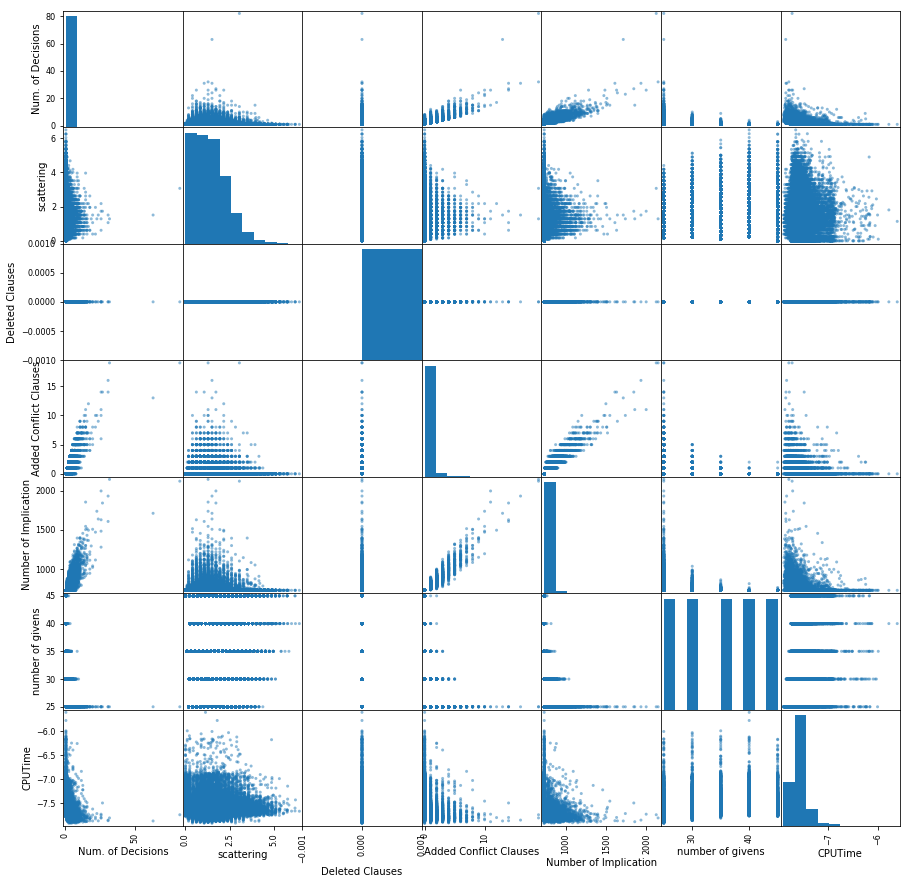

In [69]:
var_num_givens_block=[y["var nogb"] for y in solutions]
df_stats["scattering"] = var_num_givens_block

import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(df_stats[["Num. of Decisions", "scattering", "Deleted Clauses", "Added Conflict Clauses","Number of Implication", "number of givens", "CPUTime"]], figsize=(15,15))
plt.show()

In [70]:
list(df_stats.keys())

['AddCl:',
 'AddLit:',
 'Added Conflict Clauses',
 'Added Conflict Literals',
 'AveBubbleMove:',
 'CPUTime',
 'Dec:',
 'DelCl:',
 'DelLit:',
 'Deleted (Total) Literals',
 'Deleted Clauses',
 'Deleted Conflict Clauses',
 'Max Decision Level',
 'Num of Shrinkings',
 'Num. of Decisions',
 'NumImp:',
 'Number of Implication',
 'Original Num Clauses',
 'Original Num Literals',
 'Original Num Variables',
 'RESULT:',
 'Random Seed Used',
 'Shrinking Decisions',
 'Stack',
 'Total Run Time',
 'Vsids',
 'cputime',
 'number of givens',
 'scattering']

In [71]:
stats_45 = df_stats[df_stats["number of givens"]==45]
stats_35 = df_stats[df_stats["number of givens"]==35]
stats_30 = df_stats[df_stats["number of givens"]==30]
stats_40 = df_stats[df_stats["number of givens"]==40]
stats_25 = df_stats[df_stats["number of givens"]==25]

/Users/edwinlima/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  app.launch_new_instance()


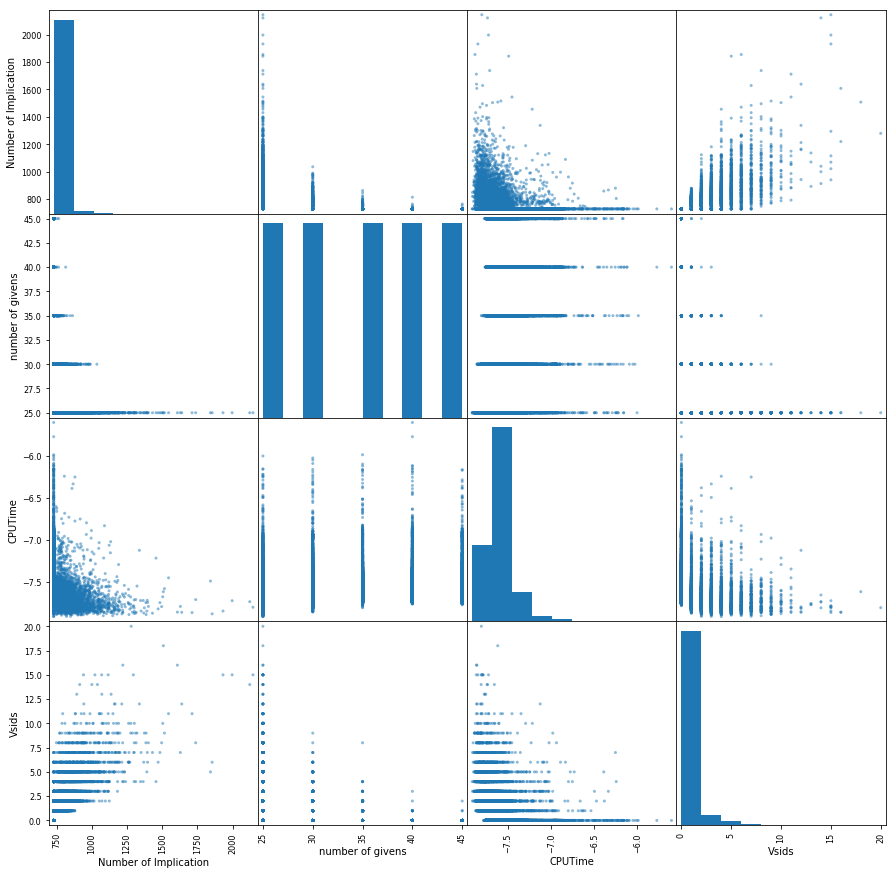

In [88]:


pd.scatter_matrix(df_stats[["Number of Implication", "number of givens", "CPUTime", "Vsids"]], figsize=(15,15))
plt.show()

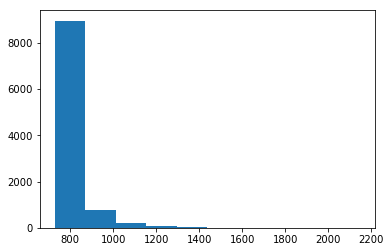

(array([  8.94700000e+03,   7.53000000e+02,   1.97000000e+02,
          6.20000000e+01,   2.20000000e+01,   8.00000000e+00,
          4.00000000e+00,   3.00000000e+00,   2.00000000e+00,
          2.00000000e+00]),
 array([  729. ,   870.6,  1012.2,  1153.8,  1295.4,  1437. ,  1578.6,
         1720.2,  1861.8,  2003.4,  2145. ]),
 <a list of 10 Patch objects>)

In [111]:
plt.hist(stats_25["Number of Implication"])
plt.show()
plt.hist(stats_25["Number of Implication"])

## Number of Givens vs CPU TIme

/Users/edwinlima/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  from ipykernel import kernelapp as app


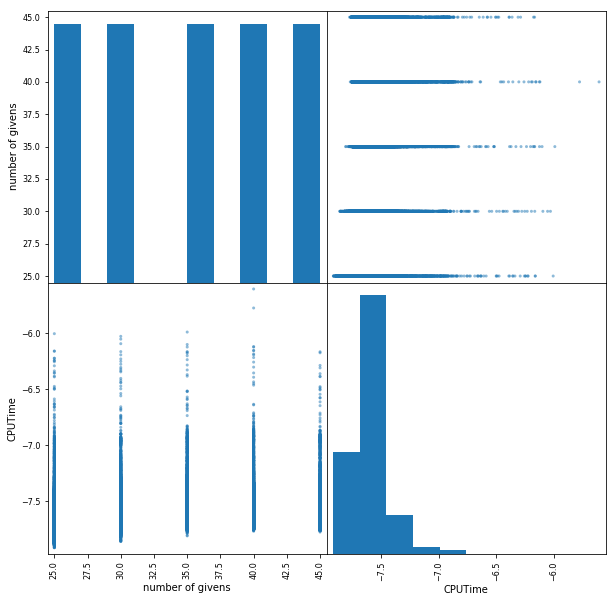

In [73]:
#print(df_stats.keys())
pd.scatter_matrix(df_stats[["number of givens","CPUTime"]], figsize=(10,10))
plt.show()


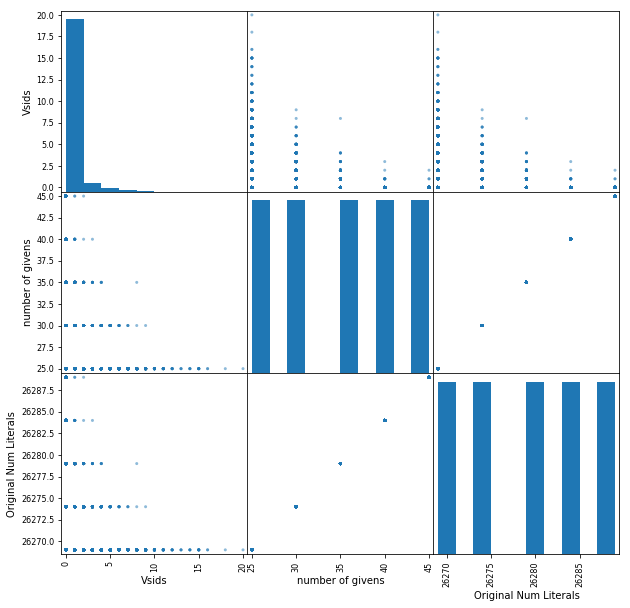

In [74]:
pd.plotting.scatter_matrix(df_stats[["Vsids","number of givens", "Original Num Literals"]], figsize=(10,10))
plt.show()

## scattering vs CPUTime

/Users/edwinlima/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  if __name__ == '__main__':


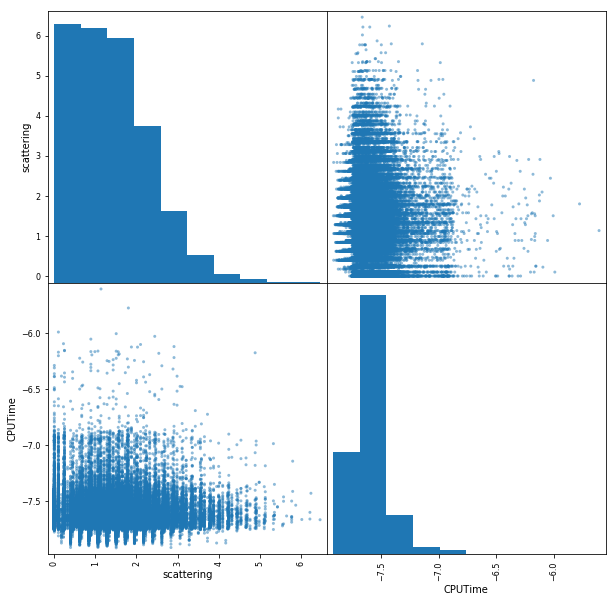

/Users/edwinlima/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead


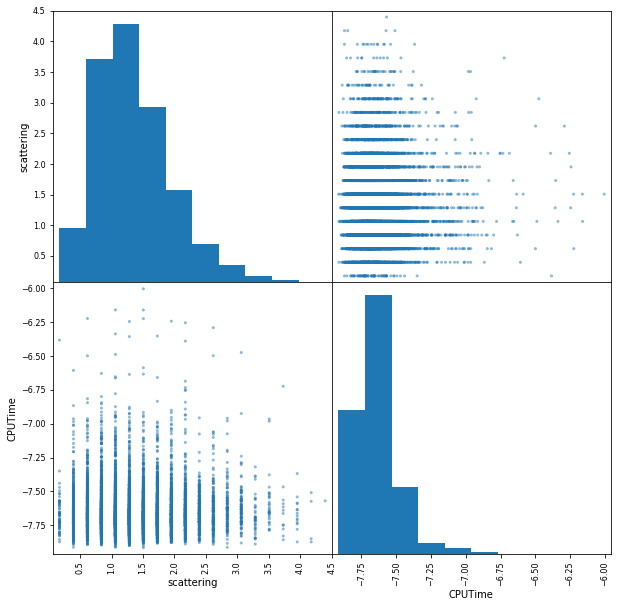

/Users/edwinlima/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead


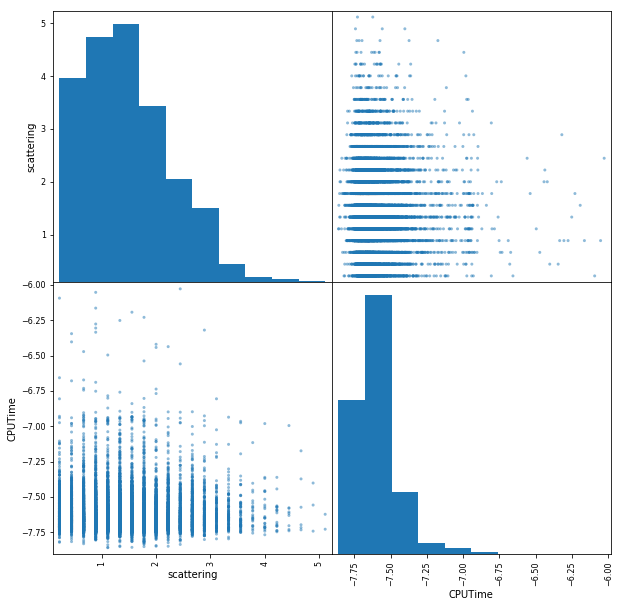

/Users/edwinlima/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead


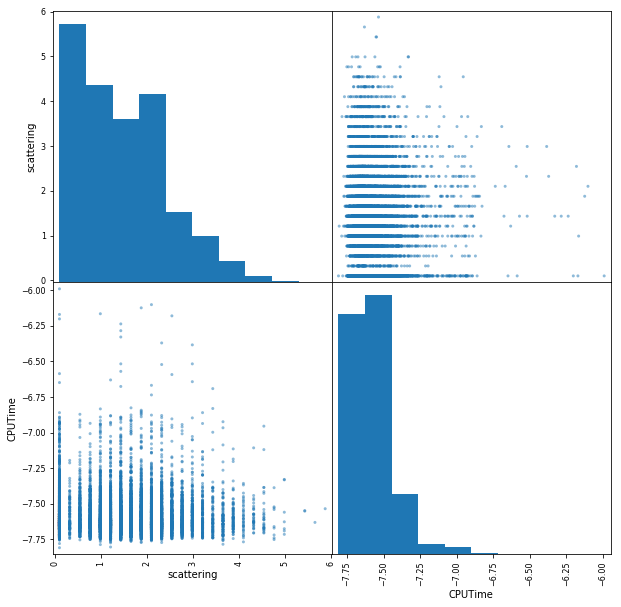

/Users/edwinlima/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead


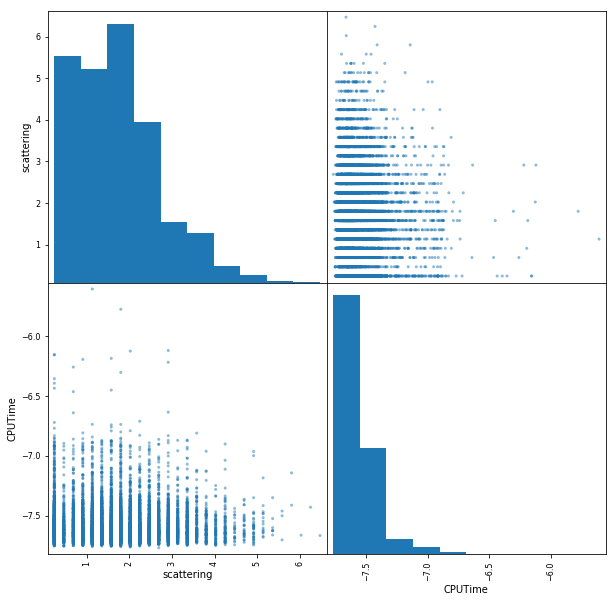

/Users/edwinlima/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:16: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead


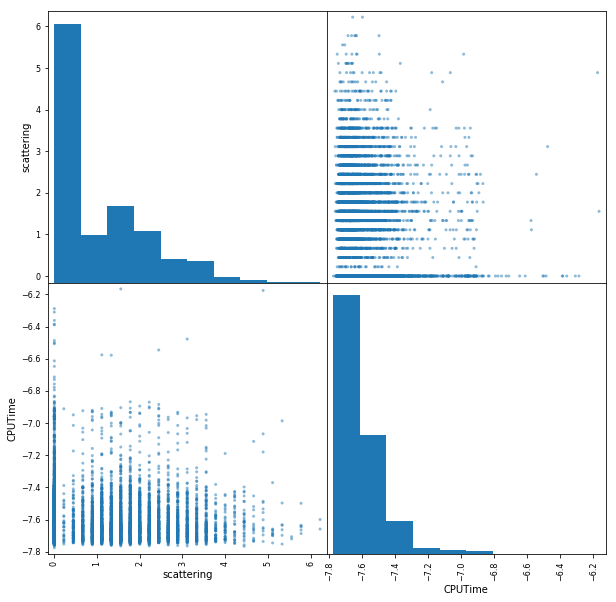

In [75]:
pd.scatter_matrix(df_stats[["scattering","CPUTime"]], figsize=(10,10))
plt.show()

pd.scatter_matrix(stats_25[["scattering","CPUTime"]], figsize=(10,10))
plt.show()

pd.scatter_matrix(stats_30[["scattering","CPUTime"]], figsize=(10,10))
plt.show()

pd.scatter_matrix(stats_35[["scattering","CPUTime"]], figsize=(10,10))
plt.show()

pd.scatter_matrix(stats_40[["scattering","CPUTime"]], figsize=(10,10))
plt.show()

pd.scatter_matrix(stats_45[["scattering","CPUTime"]], figsize=(10,10))
plt.show()

## Histogram scattering

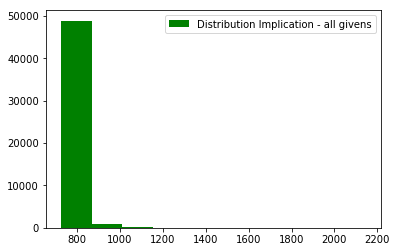

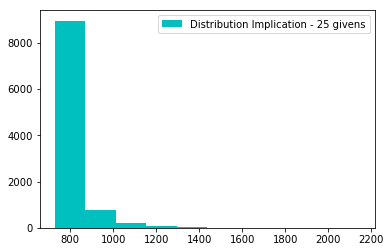

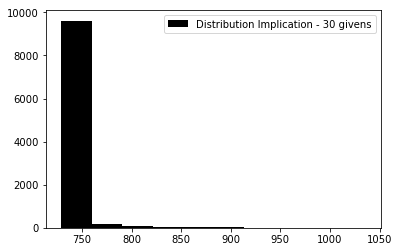

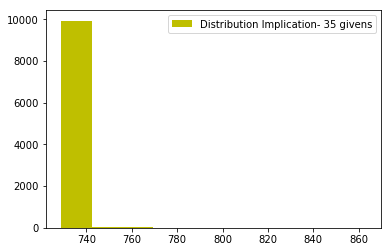

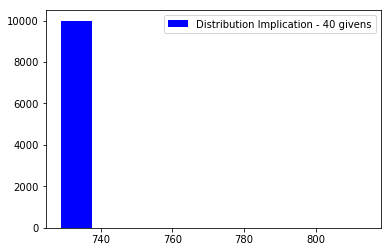

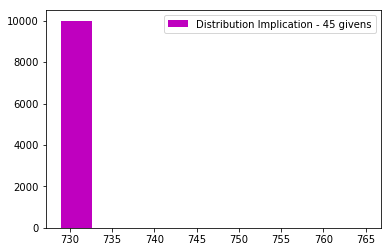

In [76]:
#distribution number of implications
plt.hist([df_stats["Number of Implication"]], color='g', label='Distribution Implication - all givens')#, normed=True)
plt.legend()
plt.show()
plt.hist([stats_25["Number of Implication"]], color='c', label='Distribution Implication - 25 givens')
plt.legend()
plt.show()
plt.hist([stats_30["Number of Implication"]], color='k', label='Distribution Implication - 30 givens')
plt.legend()
plt.show()
plt.hist([stats_35["Number of Implication"]], color='y',label='Distribution Implication- 35 givens')
plt.legend()
plt.show()
plt.hist([stats_40["Number of Implication"]], color='b', label='Distribution Implication - 40 givens')
plt.legend()
plt.show()
plt.hist([stats_45["Number of Implication"]], color='m', label='Distribution Implication - 45 givens')
plt.legend()
plt.show()

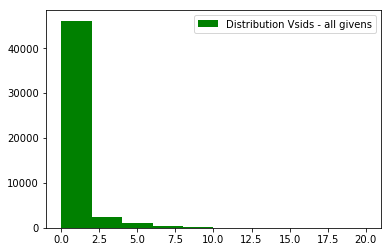

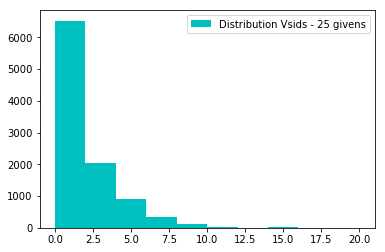

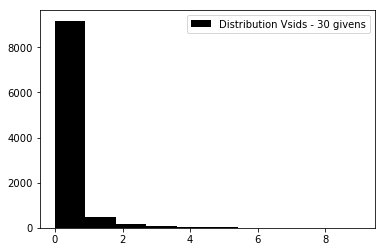

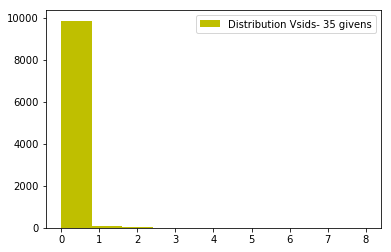

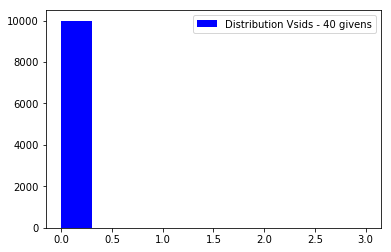

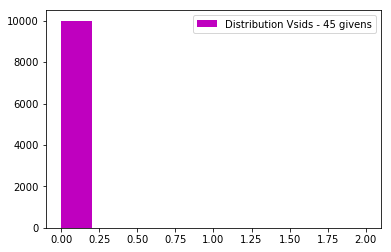

In [77]:
#distribution number of Vsids

plt.hist([df_stats["Vsids"]], color='g', label='Distribution Vsids - all givens')#, normed=True)
plt.legend()
plt.show()
plt.hist([stats_25["Vsids"]], color='c', label='Distribution Vsids - 25 givens')
plt.legend()
plt.show()
plt.hist([stats_30["Vsids"]], color='k', label='Distribution Vsids - 30 givens')
plt.legend()
plt.show()
plt.hist([stats_35["Vsids"]], color='y', label='Distribution Vsids- 35 givens')
plt.legend()
plt.show()
plt.hist([stats_40["Vsids"]], color='b', label='Distribution Vsids - 40 givens')
plt.legend()
plt.show()
plt.hist([stats_45["Vsids"]], color='m', label='Distribution Vsids - 45 givens')
plt.legend()
plt.show()

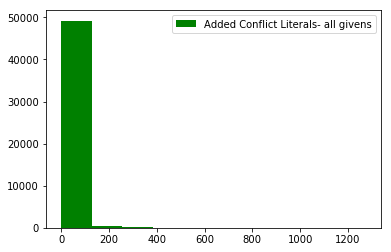

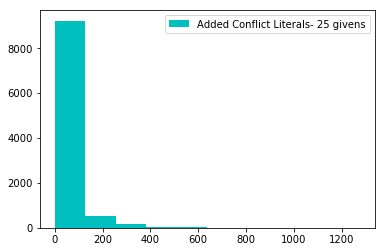

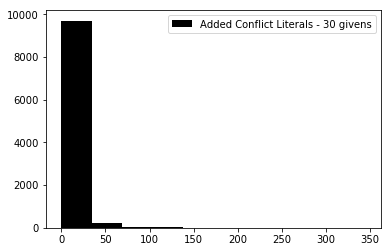

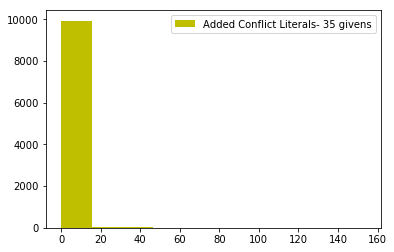

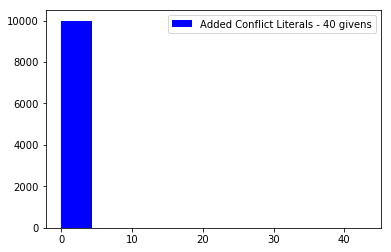

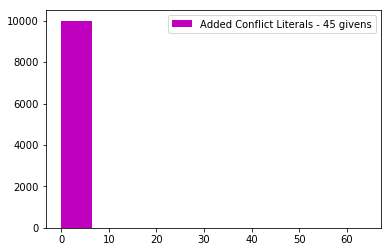

In [78]:
#distribution number of implications
plt.hist([df_stats["Added Conflict Literals"]], color='g', label='Added Conflict Literals- all givens')#, normed=True)
plt.legend()
plt.show()
plt.hist([stats_25["Added Conflict Literals"]], color='c', label='Added Conflict Literals- 25 givens')
plt.legend()
plt.show()
plt.hist([stats_30["Added Conflict Literals"]], color='k', label='Added Conflict Literals - 30 givens')
plt.legend()
plt.show()
plt.hist([stats_35["Added Conflict Literals"]], color='y',label='Added Conflict Literals- 35 givens')
plt.legend()
plt.show()
plt.hist([stats_40["Added Conflict Literals"]], color='b', label='Added Conflict Literals - 40 givens')
plt.legend()
plt.show()
plt.hist([stats_45["Added Conflict Literals"]], color='m', label='Added Conflict Literals - 45 givens')
plt.legend()
plt.show()

In [79]:
#compute number of givens per set

def nog(puzzle):
    givens=[]
    N=9
    for i in range(N):
        for j in range(N):
            if puzzle[i,j] !=0:
                givens.append([i,j,puzzle[i,j]])
    return len(givens)

def get_nog(puzzles):
    l_nog=[]
    for puzzle in puzzles:
        l_nog.append(nog(puzzle["sudoku"]))
    return l_nog



#alles=expert+easy+intermediate+simple
nog_zero=get_nog(zero)
nog_one = get_nog(one)
nog_two = get_nog(two)
nog_three=get_nog(three)
nog_five =get_nog(five)
print("nog zero", set(nog_zero))
print("nog two", set(nog_two))
print("nog three", set(nog_three))
print("nog one", set(nog_one))
print("nog five", set(nog_five))

nog zero {45}
nog two {35}
nog three {30}
nog one {40}
nog five {25}


In [49]:
from tabulate import tabulate
table = df_stats[["scattering", "CPUTime"]].describe()
print(tabulate(table, tablefmt="latex"))
df_stats[["scattering", "CPUTime"]].describe()

\begin{tabular}{lrr}
\hline
 count & 50003        & 50003           \\
 mean  &     1.35211  &     0.000492348 \\
 std   &     0.971248 &     0.000104778 \\
 min   &     0        &     0.000359    \\
 25\%   &     0.617284 &     0.00044     \\
 50\%   &     1.28395  &     0.000465    \\
 75\%   &     1.95062  &     0.000509    \\
 max   &     6.46914  &     0.00276     \\
\hline
\end{tabular}


,scattering,CPUTime
count,50003.000000,50003.000000
mean,1.352109,0.000492
std,0.971248,0.000105
min,0.000000,0.000359
25%,0.617284,0.000440
50%,1.283951,0.000465
75%,1.950617,0.000509
max,6.469136,0.002760


In [80]:
table = stats_25[["scattering", "CPUTime"]].describe()
print(tabulate(table, tablefmt="latex"))

\begin{tabular}{lrr}
\hline
 count & 10000        & 10000        \\
 mean  &     1.30995  &    -7.63864  \\
 std   &     0.625732 &     0.161518 \\
 min   &     0.17284  &    -7.91561  \\
 25\%   &     0.839506 &    -7.73787  \\
 50\%   &     1.28395  &    -7.66704  \\
 75\%   &     1.7284   &    -7.57523  \\
 max   &     4.39506  &    -6.00435  \\
\hline
\end{tabular}


In [81]:
table=stats_30[["scattering", "CPUTime"]].describe()
print(tabulate(table, tablefmt="latex"))

\begin{tabular}{lrr}
\hline
 count & 10000        & 10000       \\
 mean  &     1.46067  &    -7.59549 \\
 std   &     0.770649 &     0.15156 \\
 min   &     0.222222 &    -7.85967 \\
 25\%   &     0.888889 &    -7.69302 \\
 50\%   &     1.33333  &    -7.63343 \\
 75\%   &     2        &    -7.54263 \\
 max   &     5.11111  &    -6.02813 \\
\hline
\end{tabular}


In [82]:
table=stats_35[["scattering", "CPUTime"]].describe()
print(tabulate(table, tablefmt="latex"))

\begin{tabular}{lrr}
\hline
 count & 10001         & 10001        \\
 mean  &     1.39564   &    -7.5669   \\
 std   &     1.01774   &     0.147265 \\
 min   &     0.0987654 &    -7.80916  \\
 25\%   &     0.54321   &    -7.65642  \\
 50\%   &     1.4321    &    -7.60692  \\
 75\%   &     2.09877   &    -7.51656  \\
 max   &     5.87654   &    -5.98987  \\
\hline
\end{tabular}


In [83]:
table = stats_40[["scattering", "CPUTime"]].describe()
print(tabulate(table, tablefmt="latex"))

\begin{tabular}{lrr}
\hline
 count & 10001        & 10001       \\
 mean  &     1.65784  &    -7.56385 \\
 std   &     1.03415  &     0.15892 \\
 min   &     0.246914 &    -7.76814 \\
 25\%   &     0.91358  &    -7.66065 \\
 50\%   &     1.58025  &    -7.60491 \\
 75\%   &     2.24691  &    -7.51106 \\
 max   &     6.46914  &    -5.60539 \\
\hline
\end{tabular}


In [85]:
table=stats_45[["scattering", "CPUTime"]].describe()
print(tabulate(table, tablefmt="latex"))

\begin{tabular}{lrr}
\hline
 count & 10001        & 10001        \\
 mean  &     0.936462 &    -7.5979   \\
 std   &     1.15952  &     0.141629 \\
 min   &     0        &    -7.77526  \\
 25\%   &     0        &    -7.68211  \\
 50\%   &     0        &    -7.64172  \\
 75\%   &     1.77778  &    -7.55211  \\
 max   &     6.22222  &    -6.16582  \\
\hline
\end{tabular}


In [86]:
s="a b c\t\t\t20"
s=iter(s)
print("")

In [ ]:
s=